#  Customer demographics and sales in United States

# ADD - Architectural Decisions 

The cicle to analysis and to take decisions we will supporte be CRISP-DN: 

                        Business Understanding 
                        
                        Data Understanding 
                        
                        Data Preparation 
                        
                        Modeling
                        
                        Evaluation
                        
                        Deployment

## BUSINESS UNDERSTANDING:

This project will start from the assumption that the company will launch a new product, so it must carry out the market segmentation study in order to determine which will be the market niche? where it will offer the product? what characteristics the target market and consumers must meet? objective, so a database was selected that shows the demographic composition and sales, and what are these customers consume on a daily basis? and finally, the company will determine the actions to take supported by the analysis of the Data Scientist and its algorithms.

In [153]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_ed5a7e0f2a8a492f8001ec525a7957cd = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_ed5a7e0f2a8a492f8001ec525a7957cd = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

client_ed5a7e0f2a8a492f8001ec525a7957cd = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='dsoVjIx8W61Wp_BA7Zrj1icRfSl3EpjBekCK5S3amH-4',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_ed5a7e0f2a8a492f8001ec525a7957cd)

body = client_ed5a7e0f2a8a492f8001ec525a7957cd.get_object(Bucket='starpython-donotdelete-pr-dmfouols9cjvn8',Key='Customer demographics and sales.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

,CUSTNAME,GenderCode,ADDRESS1,CITY,STATE,COUNTRY_CODE,POSTAL_CODE,POSTAL_CODE_PLUS4,ADDRESS2,EMAIL_ADDRESS,...,Cleaning Products,Condiments,Frozen Foods,Kitchen Items,Meat,Office Supplies,Personal Care,Pet Supplies,Sea Food,Spices
0,Allen Perl,Mr.,4707 Hillcrest Lane,Abeto,PG,IT,6040,0,NaN,Allen.M.Perl@spambob.com,...,0,1,0,0,0,0,0,0,0,0
1,Allen Perl,Mr.,4707 Hillcrest Lane,Abeto,PG,IT,6040,0,NaN,Allen.M.Perl@spambob.com,...,1,0,0,0,0,0,0,0,0,0
2,Allen Perl,Mr.,4707 Hillcrest Lane,Abeto,PG,IT,6040,0,NaN,Allen.M.Perl@spambob.com,...,0,0,0,0,0,0,0,0,0,0
3,Allen Perl,Mr.,4707 Hillcrest Lane,Abeto,PG,IT,6040,0,NaN,Allen.M.Perl@spambob.com,...,0,0,0,0,0,0,0,0,0,0
4,Allen Perl,Mr.,4707 Hillcrest Lane,Abeto,PG,IT,6040,0,NaN,Allen.M.Perl@spambob.com,...,0,0,0,0,0,0,0,0,0,0


# Data Understanding and Preparing

In [154]:
#cleaning data unnecesary columns.

df = df.drop(columns=['ADDRESS1', 'CITY', 'COUNTRY_CODE', 'POSTAL_CODE', 'POSTAL_CODE_PLUS4', 
                      'ADDRESS2', 'EMAIL_ADDRESS', 'PHONE_NUMBER', 'LOCALITY', 'DRIVER_LICENSE', 
                      'NATIONAL_ID', 'ORDER_DATE', 'ORDER_TIME', 'NATIONALITY', 'SALESMAN_ID',
                      'CUST_ID', 'ORDER_ID', 'FREIGHT_CHARGES', 'ORDER_SALESMAN', 'ORDER_POSTED_DATE', 'ORDER_SHIP_DATE', 'AGE',
                       'ORDER_VALUE', 'T_TYPE', 'PURCHASE_STATUS', 'CUSTNAME', 'CREDITCARD_NUMBER'])

In [155]:
df.head()

,GenderCode,STATE,CREDITCARD_TYPE,PURCHASE_TOUCHPOINT,ORDER_TYPE,GENERATION,Baby Food,Diapers,Formula,Lotion,...,Cleaning Products,Condiments,Frozen Foods,Kitchen Items,Meat,Office Supplies,Personal Care,Pet Supplies,Sea Food,Spices
0,Mr.,PG,Master Card,Phone,MediumValue,Gen_Y,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
1,Mr.,PG,Master Card,Phone,MediumValue,Gen_Y,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,Mr.,PG,Master Card,Desktop,LowValue,Gen_Y,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Mr.,PG,Master Card,Phone,LowValue,Gen_Y,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Mr.,PG,Master Card,Phone,LowValue,Gen_Y,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data set Description:

The data set Customer demographics and sales has 13.733 rows and 62 columns, but after cleanned data set has 36 row:

In [156]:
print('Rows and Colums:', df.shape)

Rows and Colums: (13733, 35)


In [157]:
df['STATE'] = df['STATE'].fillna(0) #fill Columns with out date

In [158]:
df.isna().sum() 

GenderCode             0
STATE                  0
CREDITCARD_TYPE        0
PURCHASE_TOUCHPOINT    0
ORDER_TYPE             0
GENERATION             0
Baby Food              0
Diapers                0
Formula                0
Lotion                 0
Baby wash              0
Wipes                  0
Fresh Fruits           0
Fresh Vegetables       0
Beer                   0
Wine                   0
Club Soda              0
Sports Drink           0
Chips                  0
Popcorn                0
Oatmeal                0
Medicines              0
Canned Foods           0
Cigarettes             0
Cheese                 0
Cleaning Products      0
Condiments             0
Frozen Foods           0
Kitchen Items          0
Meat                   0
Office Supplies        0
Personal Care          0
Pet Supplies           0
Sea Food               0
Spices                 0
dtype: int64

In [159]:
def count(df, spark):
    c=df.count()
    return c

In [160]:
count(df, spark) #see the elements in string

GenderCode             13733
STATE                  13733
CREDITCARD_TYPE        13733
PURCHASE_TOUCHPOINT    13733
ORDER_TYPE             13733
GENERATION             13733
Baby Food              13733
Diapers                13733
Formula                13733
Lotion                 13733
Baby wash              13733
Wipes                  13733
Fresh Fruits           13733
Fresh Vegetables       13733
Beer                   13733
Wine                   13733
Club Soda              13733
Sports Drink           13733
Chips                  13733
Popcorn                13733
Oatmeal                13733
Medicines              13733
Canned Foods           13733
Cigarettes             13733
Cheese                 13733
Cleaning Products      13733
Condiments             13733
Frozen Foods           13733
Kitchen Items          13733
Meat                   13733
Office Supplies        13733
Personal Care          13733
Pet Supplies           13733
Sea Food               13733
Spices        

In [161]:
def getNumberOfFields(df, spark):
    c=len(df.columns)
    return c

In [162]:
getNumberOfFields(df, spark) #see number of columns in data set

35

In [163]:
def getFieldName(df, spark):
    c=df.columns
    return c

In [164]:
print(getFieldName(df, spark)) #Name columns

Index(['GenderCode', 'STATE', 'CREDITCARD_TYPE', 'PURCHASE_TOUCHPOINT',
       'ORDER_TYPE', 'GENERATION', 'Baby Food', 'Diapers', 'Formula', 'Lotion',
       'Baby wash', 'Wipes', 'Fresh Fruits', 'Fresh Vegetables', 'Beer',
       'Wine', 'Club Soda', 'Sports Drink', 'Chips', 'Popcorn', 'Oatmeal',
       'Medicines', 'Canned Foods', 'Cigarettes', 'Cheese',
       'Cleaning Products', 'Condiments', 'Frozen Foods', 'Kitchen Items',
       'Meat', 'Office Supplies', 'Personal Care', 'Pet Supplies', 'Sea Food',
       'Spices'],
      dtype='object')


## Data set Statistic:

In [165]:
df.describe()

,Baby Food,Diapers,Formula,Lotion,Baby wash,Wipes,Fresh Fruits,Fresh Vegetables,Beer,Wine,...,Cleaning Products,Condiments,Frozen Foods,Kitchen Items,Meat,Office Supplies,Personal Care,Pet Supplies,Sea Food,Spices
count,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,...,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000
mean,0.053375,0.101289,0.056142,0.050681,0.053594,0.052647,0.054977,0.055487,0.054540,0.219835,...,0.101362,0.260176,0.137698,0.056797,0.055196,0.053739,0.146072,0.052501,0.139809,0.189835
std,0.224788,0.301722,0.230204,0.219353,0.225222,0.223336,0.227944,0.228936,0.227089,0.414150,...,0.301818,0.438747,0.344595,0.231464,0.228370,0.225510,0.353191,0.223044,0.346802,0.392185
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (40,5)
import warnings 
warnings.filterwarnings('ignore')

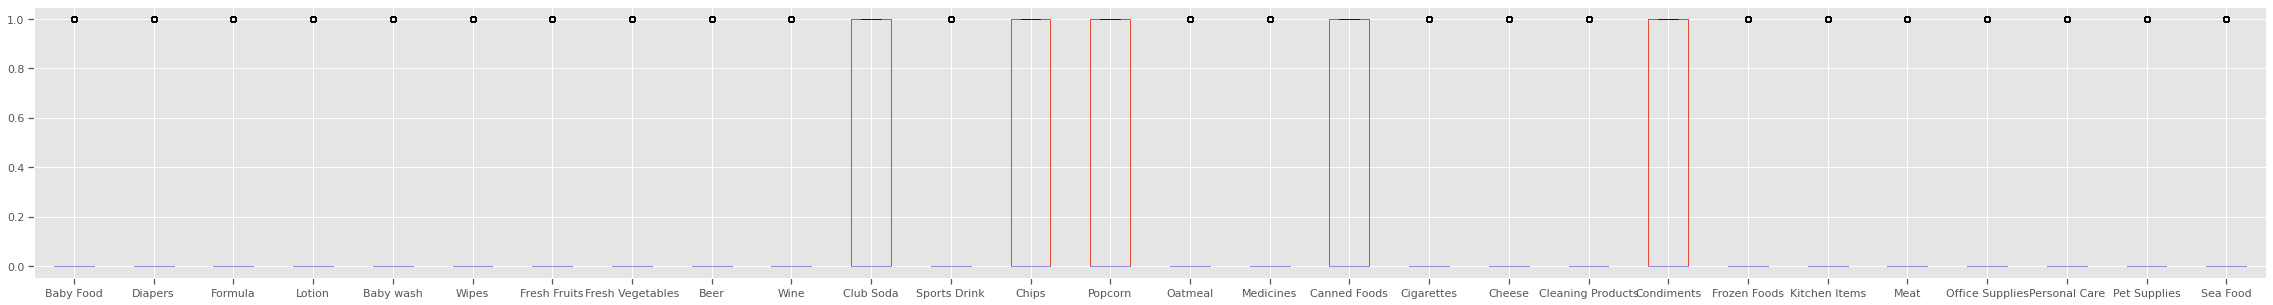

In [167]:
df[df.columns[6:-1]].boxplot();

## Correlation:

The correlation help to measure linear relationship between two quantitative variables, positive correlation is cause when the variables move in same direction, while negative correlation the variance increases as the other decreases and vice versa. if we analysis the products wine with fresh vegetable the correlation is negative -0.022. the customer buy more win decrease to buy fresh vegetables.

In [168]:
df.corr(method='pearson') #Correlation by products.

,Baby Food,Diapers,Formula,Lotion,Baby wash,Wipes,Fresh Fruits,Fresh Vegetables,Beer,Wine,...,Cleaning Products,Condiments,Frozen Foods,Kitchen Items,Meat,Office Supplies,Personal Care,Pet Supplies,Sea Food,Spices
Baby Food,1.000000,0.091002,0.064520,0.051471,0.088773,0.047012,0.046477,0.061312,0.062801,-0.008714,...,0.110236,-0.036704,-0.000876,0.083092,0.051837,0.054028,-0.000982,0.069016,-0.033143,0.018876
Diapers,0.091002,1.000000,0.081680,0.078676,0.090501,0.075398,0.096913,0.110505,0.715428,-0.026686,...,0.113559,-0.029103,-0.013684,0.083414,0.099581,0.096590,-0.005594,0.074634,-0.052527,0.046119
Formula,0.064520,0.081680,1.000000,0.056136,0.081014,0.051571,0.054974,0.062484,0.048685,-0.014889,...,0.079499,-0.022060,0.006275,0.063154,0.068490,0.084962,-0.013991,0.063144,-0.034473,0.023906
Lotion,0.051471,0.078676,0.056136,1.000000,0.067362,0.076343,0.078264,0.049857,0.052688,-0.014433,...,0.102794,-0.014439,-0.014295,0.062347,0.050276,0.059766,-0.016605,0.072129,-0.040500,0.020210
Baby wash,0.088773,0.090501,0.081014,0.067362,1.000000,0.052484,0.070268,0.058135,0.065295,-0.015457,...,0.089344,-0.014363,0.002491,0.070121,0.058582,0.072332,-0.013282,0.051259,-0.027877,0.025790
Wipes,0.047012,0.075398,0.051571,0.076343,0.052484,1.000000,0.081897,0.059653,0.052506,-0.026722,...,0.064513,-0.008255,-0.008095,0.067528,0.060102,0.052265,-0.019027,0.051227,-0.036746,0.032217
Fresh Fruits,0.046477,0.096913,0.054974,0.078264,0.070268,0.081897,1.000000,0.055969,0.068685,-0.014638,...,0.113760,-0.008325,0.001890,0.060893,0.064809,0.051605,-0.000257,0.083594,-0.043809,0.029876
Fresh Vegetables,0.061312,0.110505,0.062484,0.049857,0.058135,0.059653,0.055969,1.000000,0.084661,-0.022669,...,0.083009,-0.024834,-0.009162,0.032598,0.055633,0.049440,-0.006580,0.078429,-0.033510,0.031913
Beer,0.062801,0.715428,0.048685,0.052688,0.065295,0.052506,0.068685,0.084661,1.000000,-0.019866,...,0.077647,-0.026219,-0.012224,0.051897,0.069731,0.066478,-0.011265,0.054169,-0.039499,0.031737
Wine,-0.008714,-0.026686,-0.014889,-0.014433,-0.015457,-0.026722,-0.014638,-0.022669,-0.019866,1.000000,...,-0.028553,-0.208990,0.461432,-0.023148,-0.015888,-0.025137,0.502336,-0.023257,0.759477,0.412433


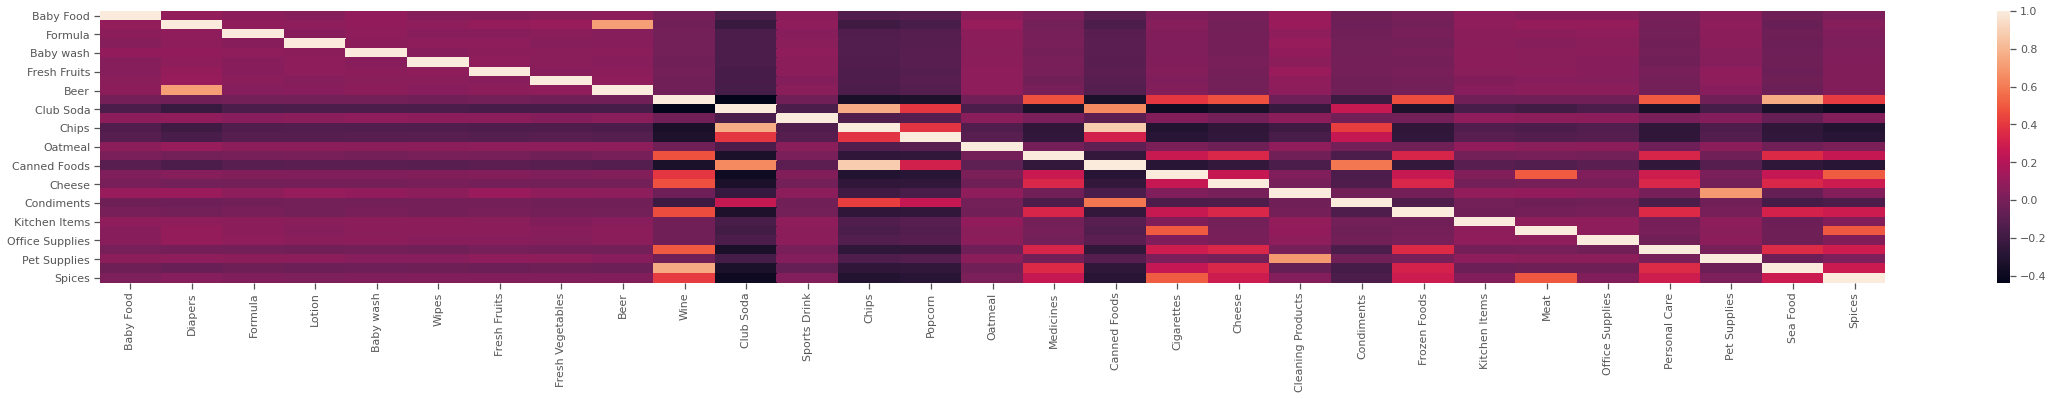

In [169]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix)

## Covariance:

Large covariance mean a strong relationship between variable, positive covariance mean that the product return move together and the move inverse if the negative covariance. Example the beer with fresh vegetables the return is minimun 0.004401.

### The formula is:

Cov(X,Y) = Σ E((X-μ)E(Y-ν)) / n-1 where:

X is a random variable

E(X) = μ is the expected value (the mean) of the random variable X and

E(Y) = ν is the expected value (the mean) of the random variable Y

n = the number of items in the data set

In [170]:
df.cov() #Covariance by products

,Baby Food,Diapers,Formula,Lotion,Baby wash,Wipes,Fresh Fruits,Fresh Vegetables,Beer,Wine,...,Cleaning Products,Condiments,Frozen Foods,Kitchen Items,Meat,Office Supplies,Personal Care,Pet Supplies,Sea Food,Spices
Baby Food,0.050530,0.006172,0.003339,0.002538,0.004494,0.002360,0.002381,0.003155,0.003206,-0.000811,...,0.007479,-0.003620,-0.000068,0.004323,0.002661,0.002739,-0.000078,0.003460,-0.002584,0.001664
Diapers,0.006172,0.091036,0.005673,0.005207,0.006150,0.005081,0.006665,0.007633,0.049019,-0.003335,...,0.010341,-0.003853,-0.001423,0.005825,0.006862,0.006572,-0.000596,0.005023,-0.005496,0.005457
Formula,0.003339,0.005673,0.052994,0.002835,0.004200,0.002651,0.002885,0.003293,0.002545,-0.001420,...,0.005524,-0.002228,0.000498,0.003365,0.003601,0.004411,-0.001138,0.003242,-0.002752,0.002158
Lotion,0.002538,0.005207,0.002835,0.048116,0.003328,0.003740,0.003913,0.002504,0.002625,-0.001311,...,0.006805,-0.001390,-0.001081,0.003166,0.002518,0.002956,-0.001286,0.003529,-0.003081,0.001739
Baby wash,0.004494,0.006150,0.004200,0.003328,0.050725,0.002640,0.003607,0.002998,0.003340,-0.001442,...,0.006073,-0.001419,0.000193,0.003655,0.003013,0.003674,-0.001057,0.002575,-0.002177,0.002278
Wipes,0.002360,0.005081,0.002651,0.003740,0.002640,0.049879,0.004169,0.003050,0.002663,-0.002472,...,0.004349,-0.000809,-0.000623,0.003491,0.003065,0.002632,-0.001501,0.002552,-0.002846,0.002822
Fresh Fruits,0.002381,0.006665,0.002885,0.003913,0.003607,0.004169,0.051958,0.002921,0.003555,-0.001382,...,0.007826,-0.000833,0.000148,0.003213,0.003374,0.002653,-0.000021,0.004250,-0.003463,0.002671
Fresh Vegetables,0.003155,0.007633,0.003293,0.002504,0.002998,0.003050,0.002921,0.052412,0.004401,-0.002149,...,0.005736,-0.002494,-0.000723,0.001727,0.002909,0.002552,-0.000532,0.004005,-0.002661,0.002865
Beer,0.003206,0.049019,0.002545,0.002625,0.003340,0.002663,0.003555,0.004401,0.051569,-0.001868,...,0.005322,-0.002612,-0.000957,0.002728,0.003616,0.003404,-0.000904,0.002744,-0.003111,0.002827
Wine,-0.000811,-0.003335,-0.001420,-0.001311,-0.001442,-0.002472,-0.001382,-0.002149,-0.001868,0.171520,...,-0.003569,-0.037975,0.065853,-0.002219,-0.001503,-0.002348,0.073479,-0.002148,0.109082,0.066989


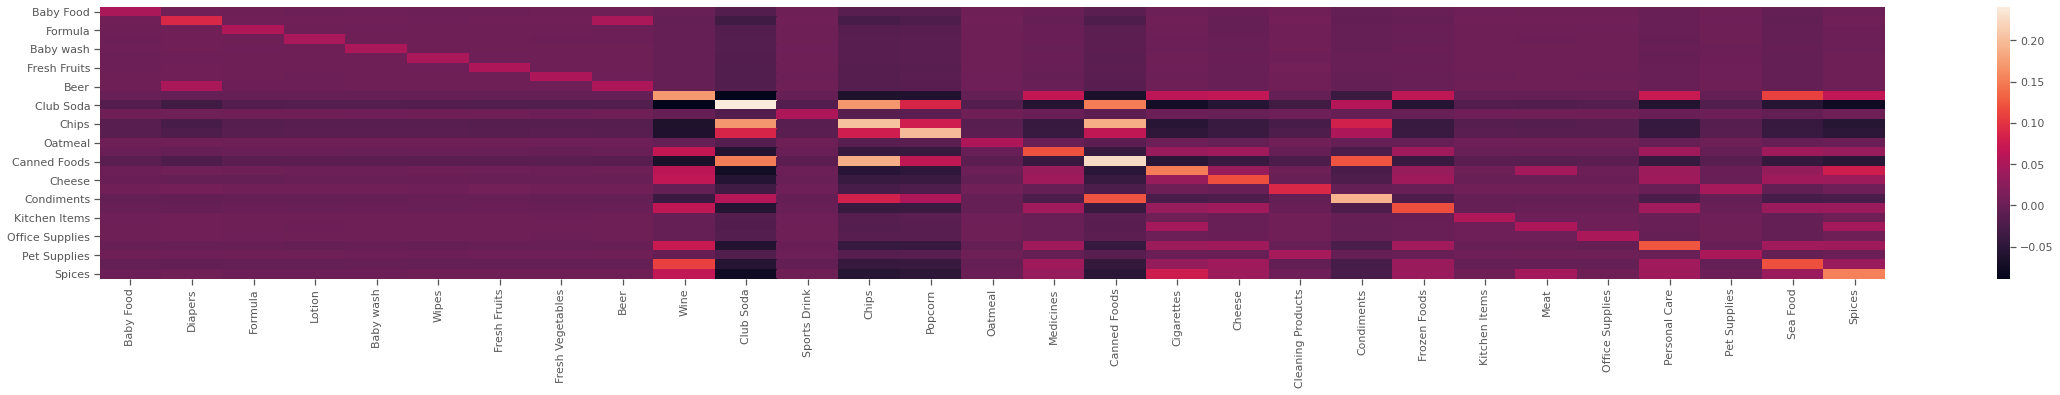

In [171]:
cov_matrix = df.cov()
sns.heatmap(cov_matrix);

## Skewness and Kurtosis:

Skewness use to measure symmetry of data along with the mean value. In this Data set some products as chips, Club Soda, Canned Foods have 0 in Skewness this mean that the data is symmetric. We need to remember that negative Skewness means more people buy the product.

In [172]:
import pandas as pd

df1 = pd.DataFrame(df)
print('The value of Skewness is:')
print(df1.skew())

The value of Skewness is:
Baby Food            3.974314
Diapers              2.643290
Formula              3.856769
Lotion               4.097362
Baby wash            3.964723
Wipes                4.006688
Fresh Fruits         3.905241
Fresh Vegetables     3.883858
Beer                 3.923794
Wine                 1.353159
Club Soda            0.392596
Sports Drink         3.892988
Chips                0.947490
Popcorn              1.002027
Oatmeal              3.865748
Medicines            2.073159
Canned Foods         0.676355
Cigarettes           1.616194
Cheese               2.087156
Cleaning Products    2.641965
Condiments           1.093382
Frozen Foods         2.103080
Kitchen Items        3.830122
Meat                 3.896043
Office Supplies      3.958360
Personal Care        2.004470
Pet Supplies         4.013239
Sea Food             2.077518
Spices               1.581962
dtype: float64


In [173]:
df1.describe() #Describe statistic information by products.

,Baby Food,Diapers,Formula,Lotion,Baby wash,Wipes,Fresh Fruits,Fresh Vegetables,Beer,Wine,...,Cleaning Products,Condiments,Frozen Foods,Kitchen Items,Meat,Office Supplies,Personal Care,Pet Supplies,Sea Food,Spices
count,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,...,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000
mean,0.053375,0.101289,0.056142,0.050681,0.053594,0.052647,0.054977,0.055487,0.054540,0.219835,...,0.101362,0.260176,0.137698,0.056797,0.055196,0.053739,0.146072,0.052501,0.139809,0.189835
std,0.224788,0.301722,0.230204,0.219353,0.225222,0.223336,0.227944,0.228936,0.227089,0.414150,...,0.301818,0.438747,0.344595,0.231464,0.228370,0.225510,0.353191,0.223044,0.346802,0.392185
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


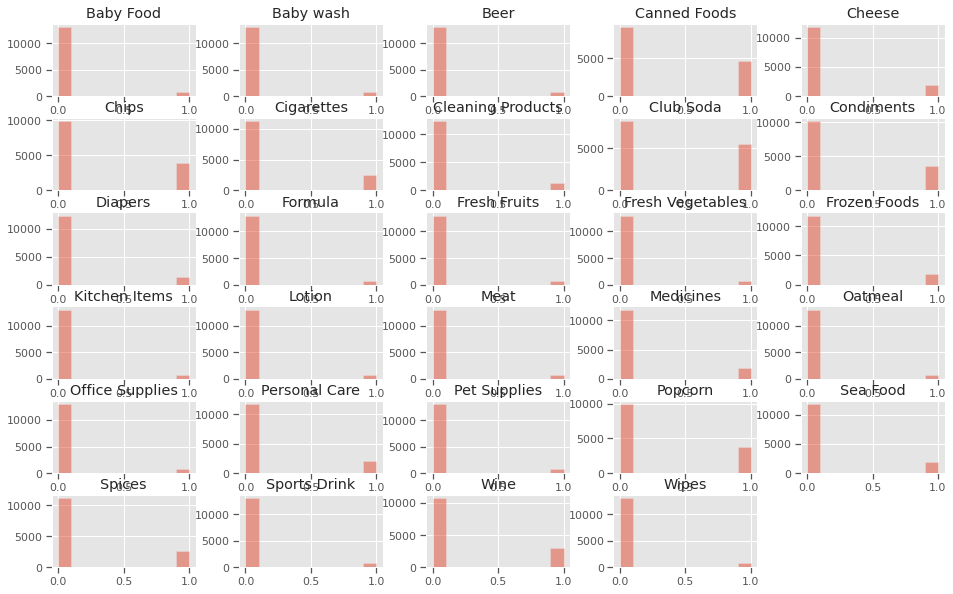

In [174]:
#Graphics compared de correlation by products.

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

matplotlib.style.use('ggplot')
df1.hist(alpha=0.5, figsize=(16,10))
plt.show()

## The Kurtosis 

The Kurtosis products as Cigarettes, Spices has to normal distribution, the products as Wine, Club Soda, Chips, Popcorn, Canned Foods, Condiments have a negative Kurtosis, tha means this products have limited customer to buy. The others products have positive kurtosis.

In [175]:
print('The Value of Kurtosis is:')
print(df1.kurtosis())

The Value of Kurtosis is:
Baby Food            13.797179
Diapers               4.987711
Formula              12.876539
Lotion               14.790530
Baby wash            13.721028
Wipes                14.055594
Fresh Fruits         13.252841
Fresh Vegetables     13.086257
Beer                 13.398114
Wine                 -0.168987
Club Soda            -1.846137
Sports Drink         13.157273
Chips                -1.102424
Popcorn              -0.996087
Oatmeal              12.945897
Medicines             2.298325
Canned Foods         -1.542769
Cigarettes            0.612173
Cheese                2.356565
Cleaning Products     4.980706
Condiments           -0.804634
Frozen Foods          2.423300
Kitchen Items        12.671678
Meat                 13.181070
Office Supplies      13.670606
Personal Care         2.018192
Pet Supplies         14.108140
Sea Food              2.316417
Spices                0.502677
dtype: float64


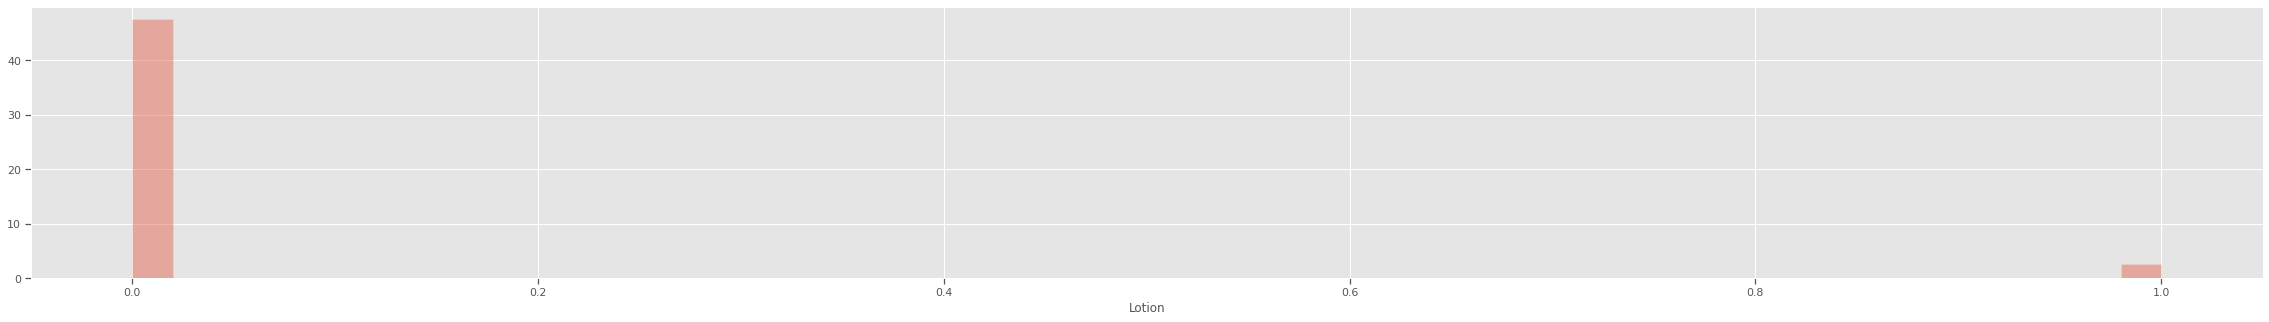

In [176]:
#Graphic that show dataframe relationship Lotion with the others products.
import seaborn as sns

sns.distplot(df1['Lotion'], hist=True, kde=True)

## Feature Engineering:

The database object of this study presents the features of segmenting the market into two categories, one is by-products and the other by qualities or characterization of the customers, so it will be coded in such a way as to show us the grouped information unifying it to In order to respond to which market segmentation the product should be directed and in which product more emphasis should be placed.

### Categorical Variable:

-GenderCode
     
     * Master
     * Miss
     * Mr.
     * Mrs.

-STATE

     * All state of United States.

-CREDITCARD_TYPE

     * American Express	
     
     * Diners Club	
     
     * Discover	
     
     * JCB	
     
     * Master Card	VISA


-PURCHASE_TOUCHPOINT
      
      * Desktop
      
      * Phone


-ORDER_TYPE

      * High Value		
      
      * Medium Value
      
      * Low Value

-GENERATION:

      * Baby Boomer that represent 76 million people born between 1946 and 1964.
      
      * generation X born between 1965 and 1980.
      
      * generation Z born after 1997.

#### Analysis:

In this dataset the generation Baby Boomer that represent 76 million people born between 1946 and 1964. They expenden more money that generation X, Y and Z, being generation X the ones who spend the least. See Table:

In [177]:
tab = pd.crosstab(df['GenderCode'], df['GENERATION'])
tab

GENERATION,Baby_Boomers,Gen_X,Gen_Y,Gen_Z
GenderCode,,,,
Master.,185,63,84,86
Miss.,175,40,106,113
Mr.,2232,784,1579,1398
Mrs.,2567,958,1723,1640


In [178]:
tab.describe()

GENERATION,Baby_Boomers,Gen_X,Gen_Y,Gen_Z
count,4.000000,4.000000,4.000000,4.000000
mean,1289.750000,461.250000,873.000000,809.250000
std,1288.712891,478.533437,900.323275,825.555722
min,175.000000,40.000000,84.000000,86.000000
25%,182.500000,57.250000,100.500000,106.250000
50%,1208.500000,423.500000,842.500000,755.500000
75%,2315.750000,827.500000,1615.000000,1458.500000
max,2567.000000,958.000000,1723.000000,1640.000000


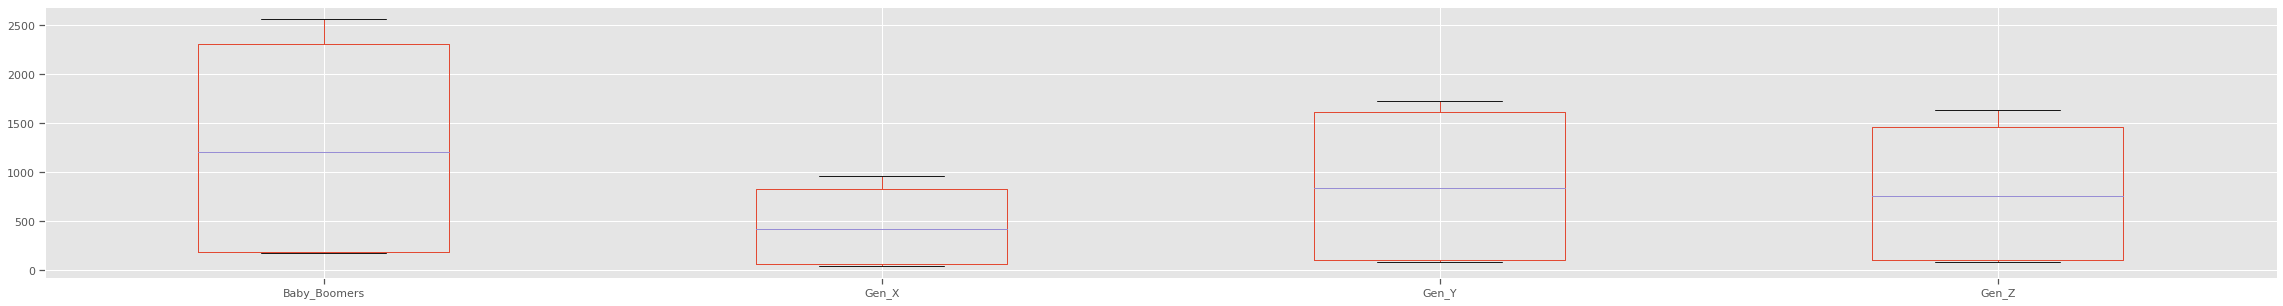

In [179]:
tab.plot(kind='box')

GENERATION,Baby_Boomers,Gen_X,Gen_Y,Gen_Z
GenderCode,,,,
Master.,185,63,84,86
Miss.,175,40,106,113
Mr.,2232,784,1579,1398
Mrs.,2567,958,1723,1640


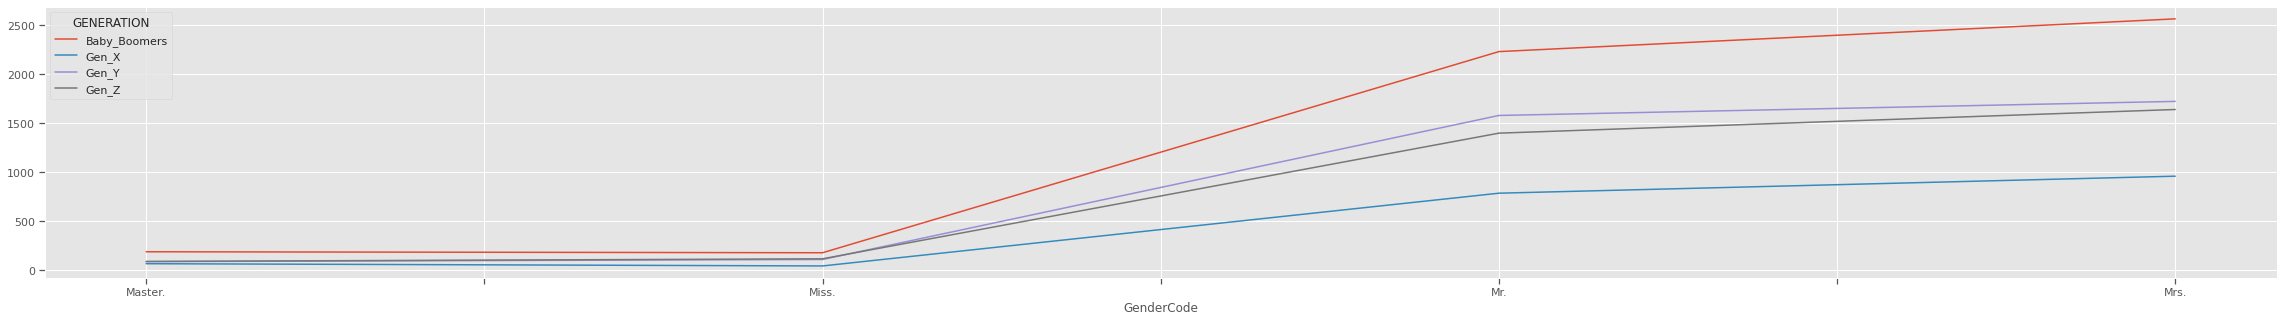

In [180]:
tab.plot();
tab

(array([[1., 2., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 2., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.

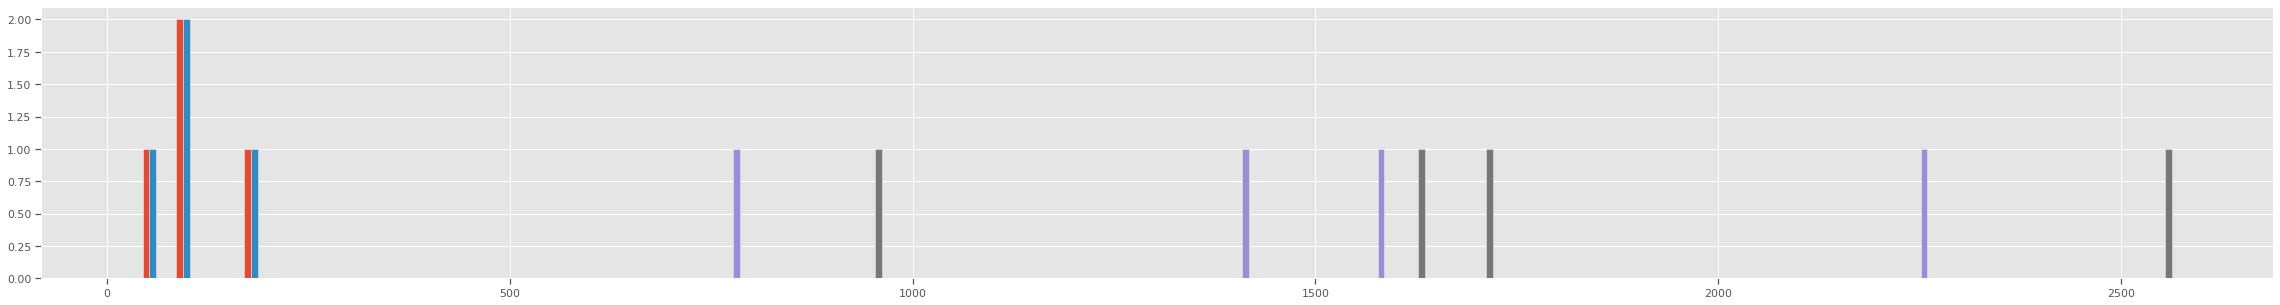

In [181]:
from scipy.stats import norm, kurtosis
kurtosis(tab)
plt.hist(tab, bins=60)

## Analysis Cross table by category

The trend in the use of Credit card the generation Boomers continue to predominate, followed by generation Z (born after 1997)

In [182]:
tab2 = pd.crosstab(df['GENERATION'], df['CREDITCARD_TYPE']) #A crosstable is a common type of table featuring a matrix of values between two or more orthogonal lists of header data
tab2

CREDITCARD_TYPE,American Express,Diners Club,Discover,JCB,Master Card,VISA
GENERATION,,,,,,
Baby_Boomers,992,1052,896,886,440,893
Gen_X,369,282,360,344,148,342
Gen_Y,665,649,615,604,291,668
Gen_Z,669,592,591,610,273,502


In [183]:
tab2.describe() #Statistic categorical compared the use of different credit card by generations.

CREDITCARD_TYPE,American Express,Diners Club,Discover,JCB,Master Card,VISA
count,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000
mean,673.750000,643.75000,615.500000,611.000000,288.000000,601.250000
std,254.463324,316.35252,219.515375,221.332329,119.635558,235.679691
min,369.000000,282.00000,360.000000,344.000000,148.000000,342.000000
25%,591.000000,514.50000,533.250000,539.000000,241.750000,462.000000
50%,667.000000,620.50000,603.000000,607.000000,282.000000,585.000000
75%,749.750000,749.75000,685.250000,679.000000,328.250000,724.250000
max,992.000000,1052.00000,896.000000,886.000000,440.000000,893.000000


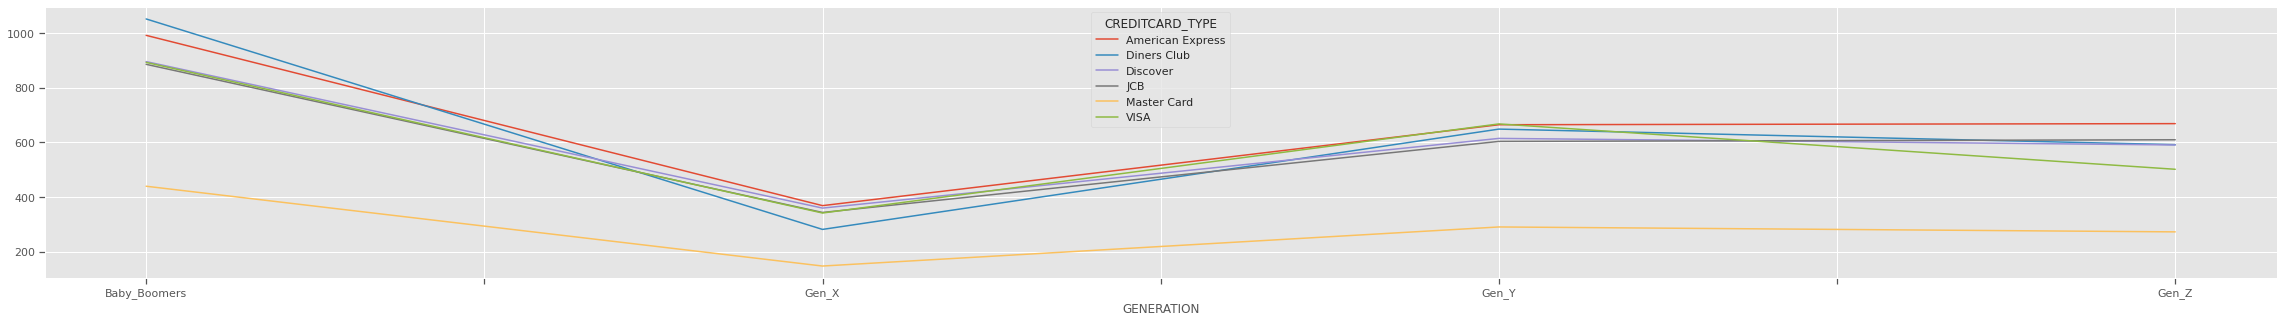

In [184]:
tab2.plot(); #Graphic used credit card type by generation.

## Statistic categorical compared the use of different credit card by gender.

In [185]:
tab3 = pd.crosstab(df['CREDITCARD_TYPE'], df['GenderCode']) #American express is the prefer by MR and MRS.
tab3

GenderCode,Master.,Miss.,Mr.,Mrs.
CREDITCARD_TYPE,,,,
American Express,80,70,1229,1316
Diners Club,72,83,1078,1342
Discover,77,89,1077,1219
JCB,77,72,1068,1227
Master Card,24,51,510,567
VISA,88,69,1031,1217


In [186]:
tab3.describe()

GenderCode,Master.,Miss.,Mr.,Mrs.
count,6.000000,6.000000,6.000000,6.000000
mean,69.666667,72.333333,998.833333,1148.000000
std,22.984052,13.140269,249.050530,289.642538
min,24.000000,51.000000,510.000000,567.000000
25%,73.250000,69.250000,1040.250000,1217.500000
50%,77.000000,71.000000,1072.500000,1223.000000
75%,79.250000,80.250000,1077.750000,1293.750000
max,88.000000,89.000000,1229.000000,1342.000000


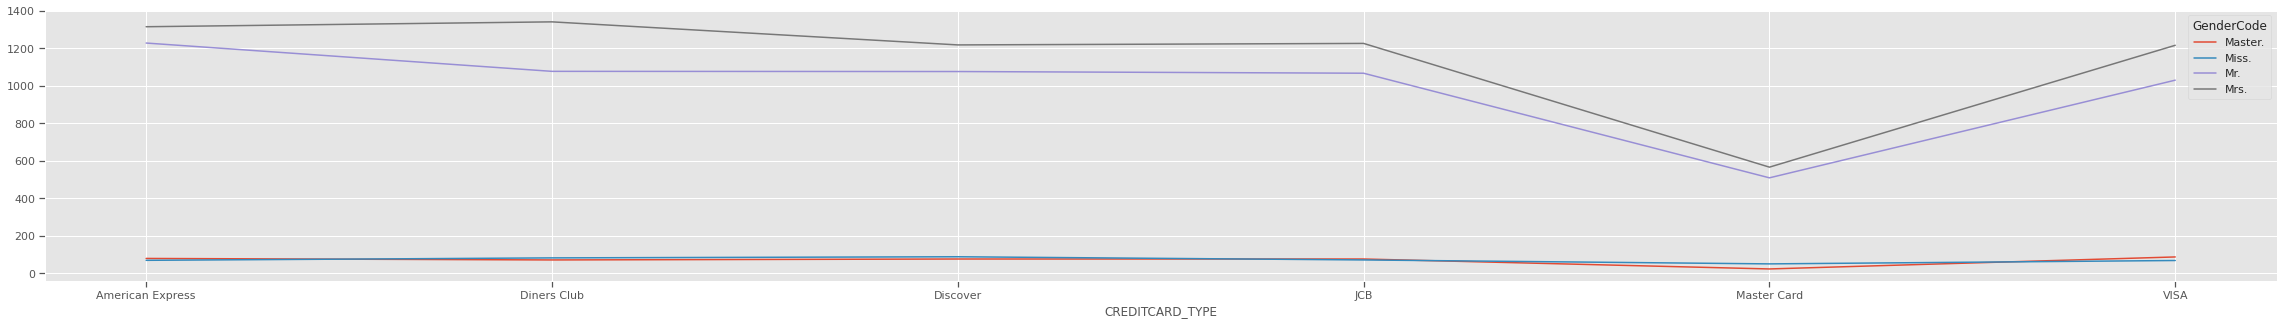

In [187]:
tab3.plot(); #Graphic to analysis the correlation into gender and credit card type.

## Statistic categorical compared the use of different Value by gender.

In [188]:
tab4 = pd.crosstab(df['GenderCode'], df['ORDER_TYPE']) #this crosstable and statistic description tell us that the mayority people expend in low value, fallowed by high value, for the Baby_Boomers and Gen_Y
tab4

ORDER_TYPE,HighValue,LowValue,MediumValue
GenderCode,,,
Master.,102,259,57
Miss.,106,262,66
Mr.,1696,3507,790
Mrs.,1939,4012,937


In [189]:
tab4.describe()

ORDER_TYPE,HighValue,LowValue,MediumValue
count,4.000000,4.00000,4.000000
mean,960.750000,2010.00000,462.500000
std,994.252609,2030.64177,466.922192
min,102.000000,259.00000,57.000000
25%,105.000000,261.25000,63.750000
50%,901.000000,1884.50000,428.000000
75%,1756.750000,3633.25000,826.750000
max,1939.000000,4012.00000,937.000000


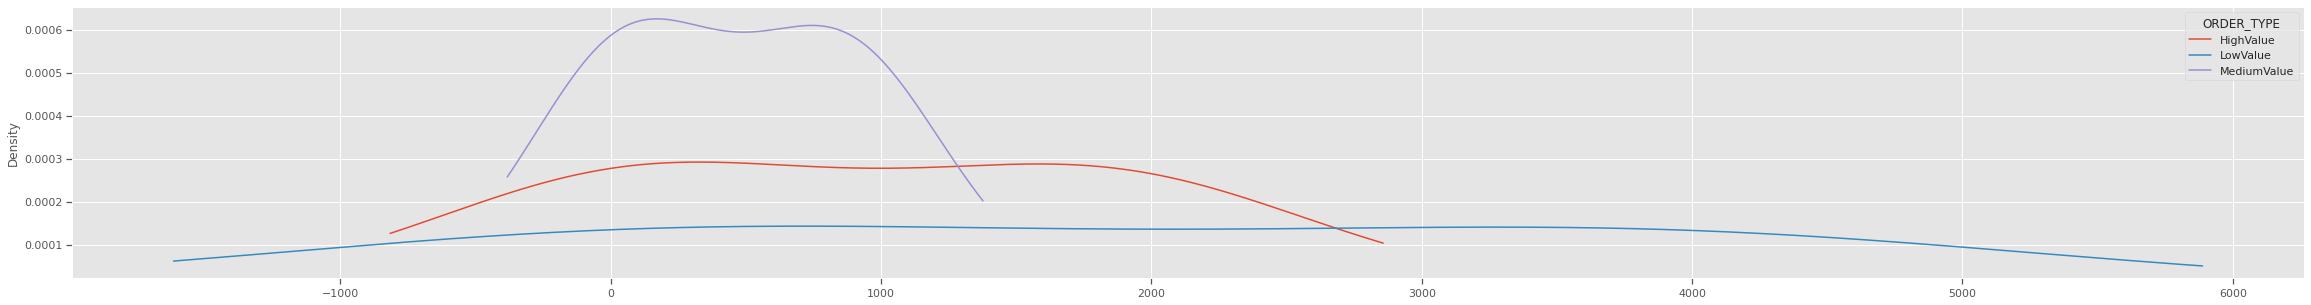

In [190]:
tab4.plot(kind='density')

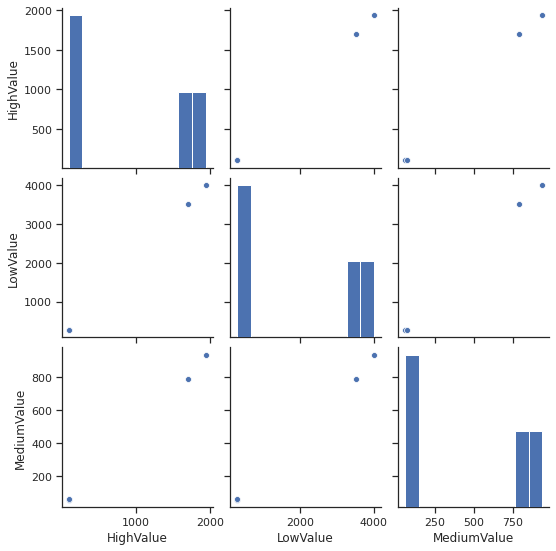

In [191]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)
pair = sns.pairplot(tab4)

In [192]:
tab5 = pd.crosstab(df['ORDER_TYPE'], df['GENERATION'])
tab5

GENERATION,Baby_Boomers,Gen_X,Gen_Y,Gen_Z
ORDER_TYPE,,,,
HighValue,2280,0,452,1111
LowValue,2411,1845,2660,1124
MediumValue,468,0,380,1002


In [193]:
tab5.describe()

GENERATION,Baby_Boomers,Gen_X,Gen_Y,Gen_Z
count,3.000000,3.000000,3.000000,3.0
mean,1719.666667,615.000000,1164.000000,1079.0
std,1085.952270,1065.211247,1296.074072,67.0
min,468.000000,0.000000,380.000000,1002.0
25%,1374.000000,0.000000,416.000000,1056.5
50%,2280.000000,0.000000,452.000000,1111.0
75%,2345.500000,922.500000,1556.000000,1117.5
max,2411.000000,1845.000000,2660.000000,1124.0


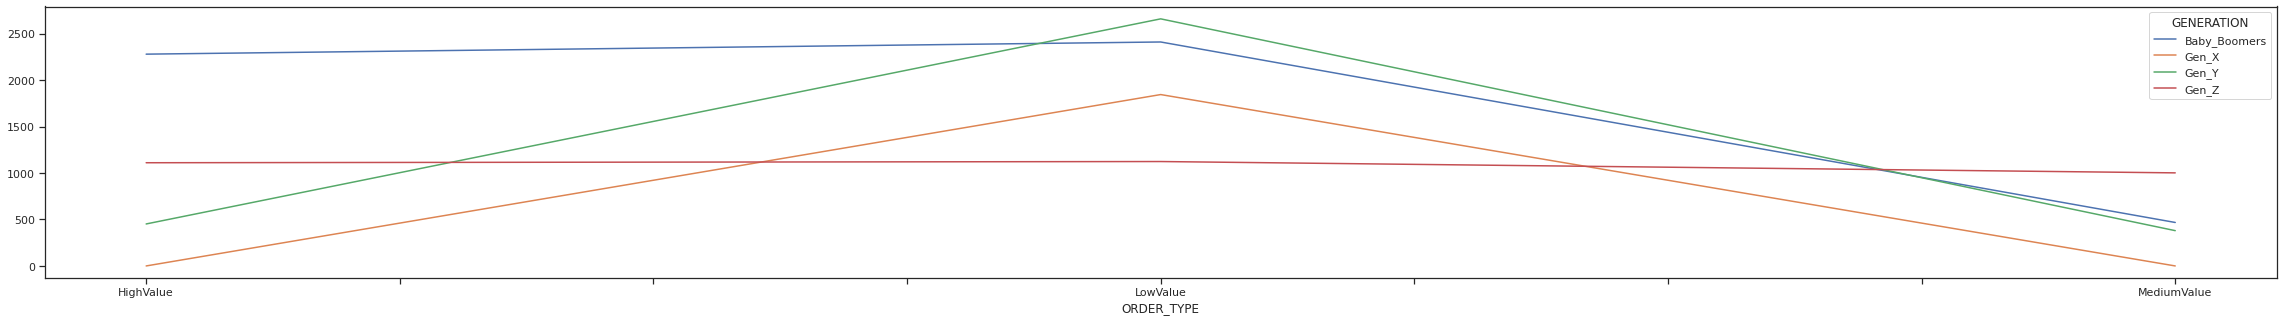

In [194]:
tab5.plot();

## Statistic categorical compared the use of different Purchase touch point by gender.

Shopping continues with the trend towards online or telephone purchases, being men and women parents the ones who currently use this system the most.

In [195]:
tab6 = pd.crosstab(df['GenderCode'], df['PURCHASE_TOUCHPOINT'])
tab6

PURCHASE_TOUCHPOINT,Desktop,Phone
GenderCode,,
Master.,106,312
Miss.,111,323
Mr.,1608,4385
Mrs.,1827,5061


In [196]:
tab6.describe()

PURCHASE_TOUCHPOINT,Desktop,Phone
count,4.000000,4.000000
mean,913.000000,2520.250000
std,933.251306,2558.448667
min,106.000000,312.000000
25%,109.750000,320.250000
50%,859.500000,2354.000000
75%,1662.750000,4554.000000
max,1827.000000,5061.000000


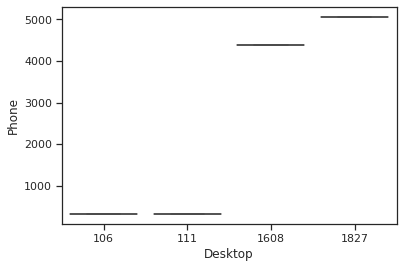

In [197]:
import matplotlib
%matplotlib inline
matplotlib.use('Agg')

plt.figure()
sns.boxplot('Desktop', 'Phone', data = tab6)
plt.show()

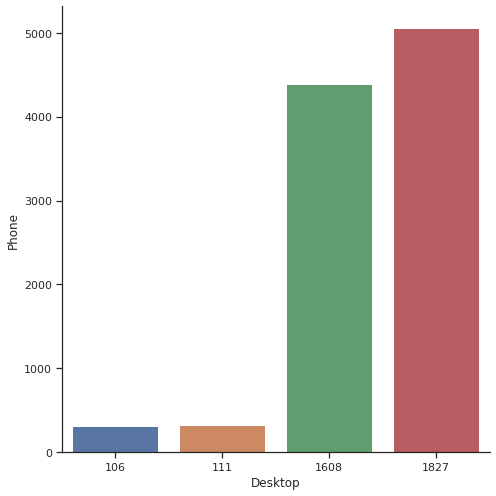

In [198]:
import seaborn as sns

sns.catplot(x='Desktop', y='Phone', kind='bar', data=tab6, height=7);

## Statistic categorical compared the use of different Purchase touch point by generation.

Generation Z is the principal used the shopping online or phone, Baby Boomers the most used purchase direct in the store and Phone.

In [199]:
tab7 = pd.crosstab(df['PURCHASE_TOUCHPOINT'], df['GENERATION'])
tab7

GENERATION,Baby_Boomers,Gen_X,Gen_Y,Gen_Z
PURCHASE_TOUCHPOINT,,,,
Desktop,2717,0,262,673
Phone,2442,1845,3230,2564


In [200]:
tab7.describe()

GENERATION,Baby_Boomers,Gen_X,Gen_Y,Gen_Z
count,2.000000,2.000000,2.000000,2.000000
mean,2579.500000,922.500000,1746.000000,1618.500000
std,194.454365,1304.612011,2098.692927,1337.138923
min,2442.000000,0.000000,262.000000,673.000000
25%,2510.750000,461.250000,1004.000000,1145.750000
50%,2579.500000,922.500000,1746.000000,1618.500000
75%,2648.250000,1383.750000,2488.000000,2091.250000
max,2717.000000,1845.000000,3230.000000,2564.000000


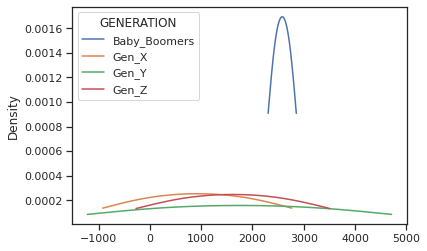

In [201]:
tab7.plot(kind = 'density')

## Statistic categorical compared the use of different State by generation.

In [202]:
tab8 = pd.crosstab(df['GENERATION'], df['STATE'])
tab8

STATE,0,AB,ACT,AG,AK,AL,AN,AO,AP,AQ,...,VE,VI,VIC,VR,VT,VV,WA,WI,WV,WY
GENERATION,,,,,,,,,,,,,,,,,,,,,
Baby_Boomers,629,5,0,3,1,19,2,0,7,17,...,11,2,82,9,19,1,35,38,6,1
Gen_X,192,5,0,1,1,8,0,0,0,0,...,7,10,30,1,5,6,9,6,0,2
Gen_Y,398,9,0,0,0,18,7,3,9,6,...,4,1,55,5,2,14,29,26,8,8
Gen_Z,368,6,5,0,9,15,7,0,1,0,...,9,11,43,0,3,7,29,34,8,4


In [203]:
tab8.describe()

STATE,0,AB,ACT,AG,AK,AL,AN,AO,AP,AQ,...,VE,VI,VIC,VR,VT,VV,WA,WI,WV,WY
count,4.000000,4.000000,4.00,4.000000,4.000000,4.000000,4.000000,4.00,4.000000,4.00000,...,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,396.750000,6.250000,1.25,1.000000,2.750000,15.000000,4.000000,0.75,4.250000,5.75000,...,7.750000,6.000000,52.50000,3.750000,7.250000,7.000000,25.500000,26.000000,5.500000,3.750000
std,179.527853,1.892969,2.50,1.414214,4.193249,4.966555,3.559026,1.50,4.425306,8.01561,...,2.986079,5.228129,22.15852,4.112988,7.932003,5.354126,11.357817,14.236104,3.785939,3.095696
min,192.000000,5.000000,0.00,0.000000,0.000000,8.000000,0.000000,0.00,0.000000,0.00000,...,4.000000,1.000000,30.00000,0.000000,2.000000,1.000000,9.000000,6.000000,0.000000,1.000000
25%,324.000000,5.000000,0.00,0.000000,0.750000,13.250000,1.500000,0.00,0.750000,0.00000,...,6.250000,1.750000,39.75000,0.750000,2.750000,4.750000,24.000000,21.000000,4.500000,1.750000
50%,383.000000,5.500000,0.00,0.500000,1.000000,16.500000,4.500000,0.00,4.000000,3.00000,...,8.000000,6.000000,49.00000,3.000000,4.000000,6.500000,29.000000,30.000000,7.000000,3.000000
75%,455.750000,6.750000,1.25,1.500000,3.000000,18.250000,7.000000,0.75,7.500000,8.75000,...,9.500000,10.250000,61.75000,6.000000,8.500000,8.750000,30.500000,35.000000,8.000000,5.000000
max,629.000000,9.000000,5.00,3.000000,9.000000,19.000000,7.000000,3.00,9.000000,17.00000,...,11.000000,11.000000,82.00000,9.000000,19.000000,14.000000,35.000000,38.000000,8.000000,8.000000


## Categorical Analysis by Products:

The analysis of the products we can see how the first 3 products that are bought the most are Lotions, wipes and cleaning products. See Table.

In [204]:
product = pd.crosstab(df['Baby wash'], df['STATE'])
product

STATE,0,AB,ACT,AG,AK,AL,AN,AO,AP,AQ,...,VE,VI,VIC,VR,VT,VV,WA,WI,WV,WY
Baby wash,,,,,,,,,,,,,,,,,,,,,
0,1511,24,4,4,11,58,15,3,15,22,...,29,24,198,15,29,28,98,92,22,13
1,76,1,1,0,0,2,1,0,2,1,...,2,0,12,0,0,0,4,12,0,2


In [205]:
df.groupby(by="STATE").sum()

,Baby Food,Diapers,Formula,Lotion,Baby wash,Wipes,Fresh Fruits,Fresh Vegetables,Beer,Wine,...,Cleaning Products,Condiments,Frozen Foods,Kitchen Items,Meat,Office Supplies,Personal Care,Pet Supplies,Sea Food,Spices
STATE,,,,,,,,,,,,,,,,,,,,,
0,96,173,91,96,76,84,68,90,95,395,...,165,408,244,113,109,103,271,83,259,352
AB,1,2,1,3,1,2,2,3,0,7,...,5,6,3,0,0,1,5,3,3,6
ACT,0,1,0,0,1,2,3,1,0,2,...,1,2,1,1,1,2,0,1,2,1
AG,0,0,0,0,0,1,0,0,0,1,...,2,2,0,1,1,0,1,0,0,2
AK,0,1,1,1,0,1,2,1,0,4,...,2,5,1,0,0,2,4,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VV,3,6,1,2,0,1,1,1,3,7,...,7,8,4,2,1,2,4,3,5,4
WA,9,16,6,4,4,5,6,6,9,27,...,8,23,21,3,7,3,17,4,17,24
WI,7,11,5,7,12,1,8,6,7,22,...,10,21,13,4,9,7,17,4,14,21


In [206]:
product.describe()

STATE,0,AB,ACT,AG,AK,AL,AN,AO,AP,AQ,...,VE,VI,VIC,VR,VT,VV,WA,WI,WV,WY
count,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,2.000000,2.00000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000
mean,793.500000,12.500000,2.50000,2.000000,5.500000,30.00000,8.000000,1.50000,8.500000,11.500000,...,15.500000,12.000000,105.000000,7.500000,14.500000,14.00000,51.000000,52.000000,11.000000,7.500000
std,1014.698231,16.263456,2.12132,2.828427,7.778175,39.59798,9.899495,2.12132,9.192388,14.849242,...,19.091883,16.970563,131.521861,10.606602,20.506097,19.79899,66.468037,56.568542,15.556349,7.778175
min,76.000000,1.000000,1.00000,0.000000,0.000000,2.00000,1.000000,0.00000,2.000000,1.000000,...,2.000000,0.000000,12.000000,0.000000,0.000000,0.00000,4.000000,12.000000,0.000000,2.000000
25%,434.750000,6.750000,1.75000,1.000000,2.750000,16.00000,4.500000,0.75000,5.250000,6.250000,...,8.750000,6.000000,58.500000,3.750000,7.250000,7.00000,27.500000,32.000000,5.500000,4.750000
50%,793.500000,12.500000,2.50000,2.000000,5.500000,30.00000,8.000000,1.50000,8.500000,11.500000,...,15.500000,12.000000,105.000000,7.500000,14.500000,14.00000,51.000000,52.000000,11.000000,7.500000
75%,1152.250000,18.250000,3.25000,3.000000,8.250000,44.00000,11.500000,2.25000,11.750000,16.750000,...,22.250000,18.000000,151.500000,11.250000,21.750000,21.00000,74.500000,72.000000,16.500000,10.250000
max,1511.000000,24.000000,4.00000,4.000000,11.000000,58.00000,15.000000,3.00000,15.000000,22.000000,...,29.000000,24.000000,198.000000,15.000000,29.000000,28.00000,98.000000,92.000000,22.000000,13.000000


In [207]:
product0 = pd.crosstab(df['Office Supplies'], df['ORDER_TYPE']) 
product0

ORDER_TYPE,HighValue,LowValue,MediumValue
Office Supplies,,,
0,3661,7901,1433
1,182,139,417


In [208]:
df.groupby(by="ORDER_TYPE").sum()

,Baby Food,Diapers,Formula,Lotion,Baby wash,Wipes,Fresh Fruits,Fresh Vegetables,Beer,Wine,...,Cleaning Products,Condiments,Frozen Foods,Kitchen Items,Meat,Office Supplies,Personal Care,Pet Supplies,Sea Food,Spices
ORDER_TYPE,,,,,,,,,,,,,,,,,,,,,
HighValue,204,357,201,179,194,190,205,194,193,3019,...,355,385,1891,192,201,182,2006,174,1920,2050
LowValue,134,288,156,127,127,145,130,170,153,0,...,301,2430,0,149,155,139,0,137,0,155
MediumValue,395,746,414,390,415,388,420,398,403,0,...,736,758,0,439,402,417,0,410,0,402


In [209]:
product0.describe()

ORDER_TYPE,HighValue,LowValue,MediumValue
count,2.000000,2.000000,2.00000
mean,1921.500000,4020.000000,925.00000
std,2460.024492,5488.562836,718.42049
min,182.000000,139.000000,417.00000
25%,1051.750000,2079.500000,671.00000
50%,1921.500000,4020.000000,925.00000
75%,2791.250000,5960.500000,1179.00000
max,3661.000000,7901.000000,1433.00000


In [210]:
product1 = pd.crosstab(df['Pet Supplies'], df['PURCHASE_TOUCHPOINT'])
product1

PURCHASE_TOUCHPOINT,Desktop,Phone
Pet Supplies,,
0,3370,9642
1,282,439


In [211]:
df.groupby(by="PURCHASE_TOUCHPOINT").sum()

,Baby Food,Diapers,Formula,Lotion,Baby wash,Wipes,Fresh Fruits,Fresh Vegetables,Beer,Wine,...,Cleaning Products,Condiments,Frozen Foods,Kitchen Items,Meat,Office Supplies,Personal Care,Pet Supplies,Sea Food,Spices
PURCHASE_TOUCHPOINT,,,,,,,,,,,,,,,,,,,,,
Desktop,306,515,284,272,275,285,302,304,285,1933,...,536,697,1236,322,293,265,1269,282,1224,1505
Phone,427,876,487,424,461,438,453,458,464,1086,...,856,2876,655,458,465,473,737,439,696,1102


In [212]:
product1.describe()

PURCHASE_TOUCHPOINT,Desktop,Phone
count,2.00000,2.000000
mean,1826.00000,5040.500000
std,2183.54574,6507.503707
min,282.00000,439.000000
25%,1054.00000,2739.750000
50%,1826.00000,5040.500000
75%,2598.00000,7341.250000
max,3370.00000,9642.000000


In [213]:
product2 = pd.crosstab(df['Pet Supplies'], df['CREDITCARD_TYPE'])
product2

CREDITCARD_TYPE,American Express,Diners Club,Discover,JCB,Master Card,VISA
Pet Supplies,,,,,,
0,2559,2442,2339,2313,1096,2263
1,136,133,123,131,56,142


In [214]:
df.groupby(by="CREDITCARD_TYPE").sum()

,Baby Food,Diapers,Formula,Lotion,Baby wash,Wipes,Fresh Fruits,Fresh Vegetables,Beer,Wine,...,Cleaning Products,Condiments,Frozen Foods,Kitchen Items,Meat,Office Supplies,Personal Care,Pet Supplies,Sea Food,Spices
CREDITCARD_TYPE,,,,,,,,,,,,,,,,,,,,,
American Express,132,281,139,141,148,139,146,158,154,576,...,255,669,353,155,162,161,418,136,368,509
Diners Club,155,258,158,145,125,121,140,143,141,633,...,255,693,363,138,147,138,389,133,400,544
Discover,117,243,154,122,145,140,132,120,132,567,...,256,656,334,126,111,137,339,123,361,433
JCB,134,245,141,130,116,127,141,130,122,480,...,244,630,330,137,125,122,354,131,312,431
Master Card,66,120,55,48,86,52,81,68,68,244,...,107,310,171,58,62,58,181,56,151,228
VISA,129,244,124,110,116,144,115,143,132,519,...,275,615,340,166,151,122,325,142,328,462


In [215]:
product2.describe()

CREDITCARD_TYPE,American Express,Diners Club,Discover,JCB,Master Card,VISA
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,1347.500000,1287.500000,1231.000000,1222.000000,576.000000,1202.500000
std,1713.319731,1632.709558,1566.948627,1542.906997,735.391052,1499.773483
min,136.000000,133.000000,123.000000,131.000000,56.000000,142.000000
25%,741.750000,710.250000,677.000000,676.500000,316.000000,672.250000
50%,1347.500000,1287.500000,1231.000000,1222.000000,576.000000,1202.500000
75%,1953.250000,1864.750000,1785.000000,1767.500000,836.000000,1732.750000
max,2559.000000,2442.000000,2339.000000,2313.000000,1096.000000,2263.000000


In [216]:
product3 = pd.crosstab(df['Beer'], df['GenderCode'])
product3

GenderCode,Master.,Miss.,Mr.,Mrs.
Beer,,,,
0,403,410,5656,6515
1,15,24,337,373


In [217]:
df.groupby(by="GenderCode").sum()

,Baby Food,Diapers,Formula,Lotion,Baby wash,Wipes,Fresh Fruits,Fresh Vegetables,Beer,Wine,...,Cleaning Products,Condiments,Frozen Foods,Kitchen Items,Meat,Office Supplies,Personal Care,Pet Supplies,Sea Food,Spices
GenderCode,,,,,,,,,,,,,,,,,,,,,
Master.,22,37,25,19,19,27,26,20,15,79,...,42,137,45,32,20,18,48,18,45,68
Miss.,20,42,29,30,26,18,28,29,24,89,...,43,122,53,28,17,25,51,23,53,61
Mr.,319,610,339,318,320,294,317,316,337,1326,...,634,1508,840,322,328,318,898,314,836,1152
Mrs.,372,702,378,329,371,384,384,397,373,1525,...,673,1806,953,398,393,377,1009,366,986,1326


In [218]:
product3.describe()

GenderCode,Master.,Miss.,Mr.,Mrs.
count,2.000000,2.000000,2.000000,2.00000
mean,209.000000,217.000000,2996.500000,3444.00000
std,274.357431,272.943218,3761.100969,4343.04985
min,15.000000,24.000000,337.000000,373.00000
25%,112.000000,120.500000,1666.750000,1908.50000
50%,209.000000,217.000000,2996.500000,3444.00000
75%,306.000000,313.500000,4326.250000,4979.50000
max,403.000000,410.000000,5656.000000,6515.00000


In [219]:
product4 = pd.crosstab(df['Lotion'], df['GENERATION'])
product4

GENERATION,Baby_Boomers,Gen_X,Gen_Y,Gen_Z
Lotion,,,,
0,4933,1815,3343,2946
1,226,30,149,291


In [220]:
df.groupby(by="GENERATION").sum()

,Baby Food,Diapers,Formula,Lotion,Baby wash,Wipes,Fresh Fruits,Fresh Vegetables,Beer,Wine,...,Cleaning Products,Condiments,Frozen Foods,Kitchen Items,Meat,Office Supplies,Personal Care,Pet Supplies,Sea Food,Spices
GENERATION,,,,,,,,,,,,,,,,,,,,,
Baby_Boomers,272,479,254,226,237,233,260,265,261,1789,...,482,1213,1131,286,276,254,1189,240,1120,1383
Gen_X,23,63,45,30,31,35,31,32,34,0,...,81,549,0,31,30,25,0,37,0,30
Gen_Y,164,312,151,149,165,142,148,158,155,352,...,284,987,227,165,159,156,235,146,234,371
Gen_Z,274,537,321,291,303,313,316,307,299,878,...,545,824,533,298,293,303,582,298,566,823


In [221]:
product4.describe()

GENERATION,Baby_Boomers,Gen_X,Gen_Y,Gen_Z
count,2.000000,2.000000,2.000000,2.000000
mean,2579.500000,922.500000,1746.000000,1618.500000
std,3328.351619,1262.185604,2258.499059,1877.368504
min,226.000000,30.000000,149.000000,291.000000
25%,1402.750000,476.250000,947.500000,954.750000
50%,2579.500000,922.500000,1746.000000,1618.500000
75%,3756.250000,1368.750000,2544.500000,2282.250000
max,4933.000000,1815.000000,3343.000000,2946.000000


# Model


Regression analysis is supervised machine learning, this model helps to see the relationship between a certain number of features and target variable. Also,  Logistic Regression the probability of some events is represented as a linear function of combination of predictor variables, but no required linear relationship between dependent and independent variables. These variables can be represented in the binary values (0 0r one, False or True). With sigmoid function we can do the value of range 0 to 1.



Prepared categorical data:

Normalize is the process creating tables and establishing relationships between those tables according to rules designed both to protect the data and to make the database more flexible by eliminating redundancy and inconsistent dependency.

Train dataset that use samples to create the model, and validation that is used to qualify performance.

Features and target 

steps to create the model, in case I did Logistic Regression.

In [222]:
df['GenderCode'].value_counts(normalize=True) #Normalize the dataset.
df['GenderCode'].describe()

count     13733
unique        4
top        Mrs.
freq       6888
Name: GenderCode, dtype: object

In [223]:
product_df = df.copy() #Prepared the dataset to partition.
train_set = product_df.sample(frac=0.75, random_state=0)
test_set  = product_df.drop(train_set.index)

print('training set')
print(train_set)
print('\nOriginal DataFrame')

training set
      GenderCode STATE   CREDITCARD_TYPE PURCHASE_TOUCHPOINT   ORDER_TYPE  \
3569        Mrs.     0          Discover               Phone  MediumValue   
12654        Mr.    CA          Discover               Phone     LowValue   
5455        Mrs.    PG  American Express               Phone  MediumValue   
13037        Mr.    CA       Diners Club             Desktop     LowValue   
7628         Mr.     0               JCB               Phone  MediumValue   
...          ...   ...               ...                 ...          ...   
9280        Mrs.    CA          Discover               Phone    HighValue   
12280       Mrs.    CA  American Express             Desktop  MediumValue   
8524        Mrs.    CA          Discover               Phone     LowValue   
4646         Mr.     0               JCB             Desktop  MediumValue   
4569        Mrs.    MO       Diners Club               Phone     LowValue   

         GENERATION  Baby Food  Diapers  Formula  Lotion  ... 

In [224]:
target = 'Lotion'  #create the target and train set.
y_train = train_set[target]
y_train.value_counts(normalize=True)

0    0.950485
1    0.049515
Name: Lotion, dtype: float64

In [225]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split

linear_reg = LogisticRegressionCV() #create the model.
train_set, val = train_test_split(train_set, random_state=42)
train_set.shape, val.shape

((7725, 35), (2575, 35))

In [226]:
#create the features by products.
features = ['Baby Food', 'Diapers', 'Formula', 
       'Baby wash', 'Wipes', 'Fresh Fruits', 'Fresh Vegetables', 'Beer',
       'Wine', 'Club Soda', 'Sports Drink', 'Chips', 'Popcorn', 'Oatmeal',
       'Medicines', 'Canned Foods', 'Cigarettes', 'Cheese',
       'Cleaning Products', 'Condiments', 'Frozen Foods', 'Kitchen Items',
       'Meat', 'Office Supplies', 'Personal Care', 'Pet Supplies', 'Sea Food',
       'Spices']

In [227]:
X_train = train_set[features] #create train set ann validation.
y_train = train_set[target]
X_val = val[features]
y_val = val[target]

## Logistic Regression Model

To Analysis the model, we use Logistic Regression that is a linear model where Y is the dependent variable, X represents the independent variables, B is the regression coefficients to be estimated, and e represents the errors are residuals. 

In [228]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

imputer = SimpleImputer () #impute missiing values
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

scaler = StandardScaler() #Scaler and  fit
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

model = LogisticRegressionCV(cv=5, n_jobs=1, random_state=42) #Fit the Model
model.fit(X_train_scaled, y_train)
print('Validation Accuracy', model.score(X_val_scaled, y_val)) #Model performance indicators that is not overfitting. 

Validation Accuracy 0.9518446601941748


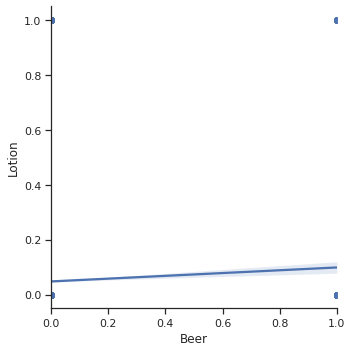

In [229]:
sns.lmplot(x='Beer', y=target, data=df, scatter_kws={'alpha':0.05}); #Graphic compared two products Lotions and beer: in all this products the lotion has high preference in the customers.

In [230]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaler = df[df.columns[6:]].copy()

In [231]:
df_scaled = pd.DataFrame(data=scaler.fit_transform(df_scaler), columns=df_scaler.columns)

In [232]:
df_scaled.describe()

,Baby Food,Diapers,Formula,Lotion,Baby wash,Wipes,Fresh Fruits,Fresh Vegetables,Beer,Wine,...,Cleaning Products,Condiments,Frozen Foods,Kitchen Items,Meat,Office Supplies,Personal Care,Pet Supplies,Sea Food,Spices
count,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,...,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000,13733.000000
mean,0.053375,0.101289,0.056142,0.050681,0.053594,0.052647,0.054977,0.055487,0.054540,0.219835,...,0.101362,0.260176,0.137698,0.056797,0.055196,0.053739,0.146072,0.052501,0.139809,0.189835
std,0.224788,0.301722,0.230204,0.219353,0.225222,0.223336,0.227944,0.228936,0.227089,0.414150,...,0.301818,0.438747,0.344595,0.231464,0.228370,0.225510,0.353191,0.223044,0.346802,0.392185
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [233]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(df_scaled.iloc[:,:-1], df_scaled.iloc[:,-1:], test_size=0.2, random_state=0)
clf = LogisticRegression(C=10).fit(X_train, y_train)

In [234]:
clf.score(X_test, y_test)

0.8248998907899526

In [235]:
from sklearn.metrics import balanced_accuracy_score


y_pred = clf.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.658039950062422

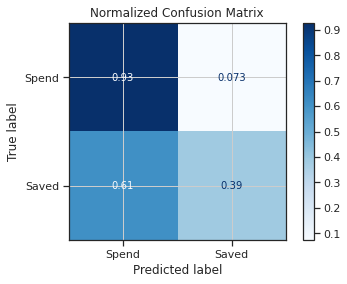

In [236]:
def conf_matrix(clf):
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                display_labels= ['Spend', 'Saved'],
                                cmap=plt.cm.Blues,
                                normalize='true')
    disp.ax_.set_title('Normalized Confusion Matrix');
    disp.ax_.grid()
conf_matrix(clf)

In [237]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

grid_values = {'C': [10, 100, 1000, 5000, 10000, 12000, 16000, 20000]}
grid_clf = LogisticRegression()

grid_clf = GridSearchCV(grid_clf, param_grid = grid_values, scoring= 'balanced_accuracy')
grid_clf.fit(X_train, y_train)
y_pred = grid_clf.predict(X_test)
print('Grid Best Parameter(max. balanced_accurracy):', grid_clf.best_params_)
print('Grid Best Score(balanced_accuracy)', grid_clf.best_score_)

Grid Best Parameter(max. balanced_accurracy): {'C': 10}
Grid Best Score(balanced_accuracy) 0.662179770545524


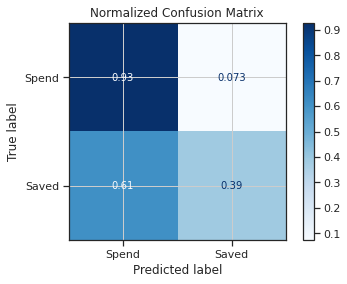

In [238]:
conf_matrix(grid_clf)

# EVALUATION

# Report validation MAE and R2
# MAE = (1/n) * Σ|yi – xi|

In [239]:
!pip install category_encoders

  Using cached category_encoders-2.2.2-py2.py3-none-any.whl (80 kB)
  Using cached pandas-1.2.3-cp37-cp37m-manylinux1_x86_64.whl (9.9 MB)
  Using cached numpy-1.20.2-cp37-cp37m-manylinux2010_x86_64.whl (15.3 MB)
  Using cached scikit_learn-0.24.1-cp37-cp37m-manylinux2010_x86_64.whl (22.3 MB)
  Using cached statsmodels-0.12.2-cp37-cp37m-manylinux1_x86_64.whl (9.5 MB)
  Using cached patsy-0.5.1-py2.py3-none-any.whl (231 kB)
  Using cached scipy-1.6.2-cp37-cp37m-manylinux1_x86_64.whl (27.4 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)
  Using cached pytz-2021.1-py2.py3-none-any.whl (510 kB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
ERROR: tensorflow 2.1.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.6.2 which is incompatible.
ERROR: ibm-watson-machine-learning 1.0.38 has requirement pandas<=1.0.5, but you'll

In [240]:
import category_encoders as ce
from sklearn.metrics import r2_score

encoder = ce.OneHotEncoder(use_cat_names=True) #Encoder and fit transform method with train set/val
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

linear = LogisticRegressionCV() #Logistic Regression 
linear.fit(X_train_encoded, y_train)

LogisticRegressionCV()

In [241]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

y_pred_train = model.predict(X_train_encoded)
y_pred_val = model.predict(X_val_encoded)

print(f'Logistic Regression with {len(features)} features: {features}')
print('______________________________________________')
print('Train Root Mean Squared Error:', 
    np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('Validation Root Mean Square Error:', 
    np.sqrt(mean_squared_error(y_val, y_pred_val)))
print('Train Mean Absolute Error:', 
    mean_absolute_error(y_train, y_pred_train))
print('Validation Mean Absolute Error:', 
    mean_absolute_error(y_val, y_pred_val))
print('Train R^2 Score:', 
    r2_score(y_train, y_pred_train))
print('Validation R^2 Score:', 
    r2_score(y_val, y_pred_val))

Logistic Regression with 28 features: ['Baby Food', 'Diapers', 'Formula', 'Baby wash', 'Wipes', 'Fresh Fruits', 'Fresh Vegetables', 'Beer', 'Wine', 'Club Soda', 'Sports Drink', 'Chips', 'Popcorn', 'Oatmeal', 'Medicines', 'Canned Foods', 'Cigarettes', 'Cheese', 'Cleaning Products', 'Condiments', 'Frozen Foods', 'Kitchen Items', 'Meat', 'Office Supplies', 'Personal Care', 'Pet Supplies', 'Sea Food', 'Spices']
______________________________________________
Train Root Mean Squared Error: 0.4356454999635012
Validation Root Mean Square Error: 0.21944324962464726
Train Mean Absolute Error: 0.18978700163844894
Validation Mean Absolute Error: 0.048155339805825245
Train R^2 Score: -0.23424334344455722
Validation R^2 Score: -0.05059159526723778


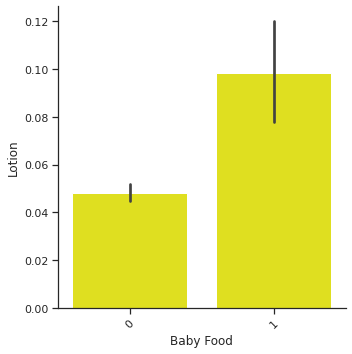

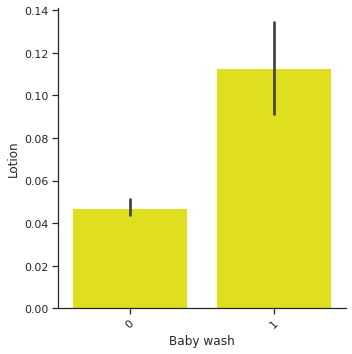

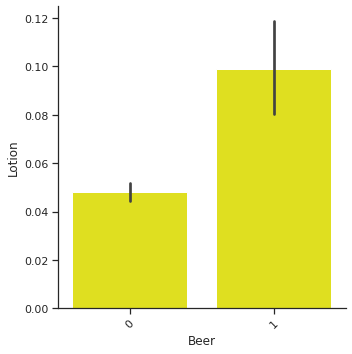

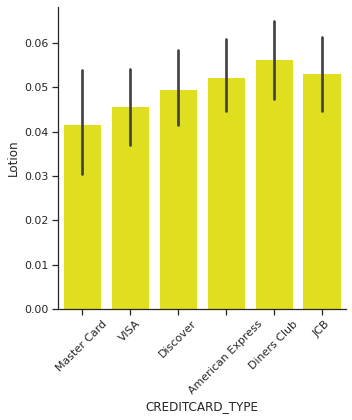

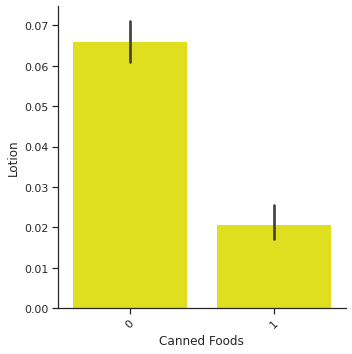

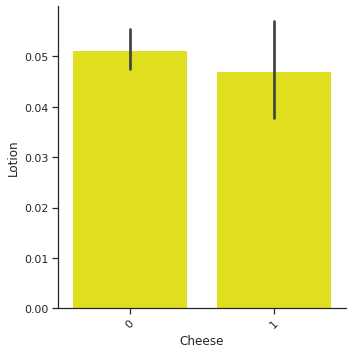

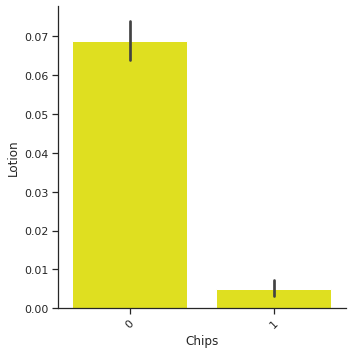

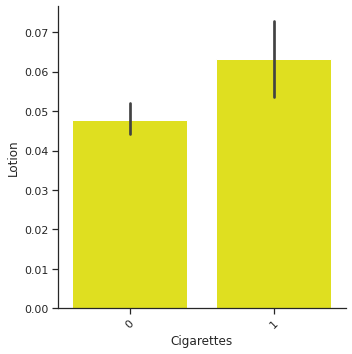

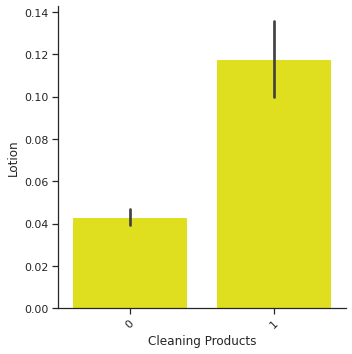

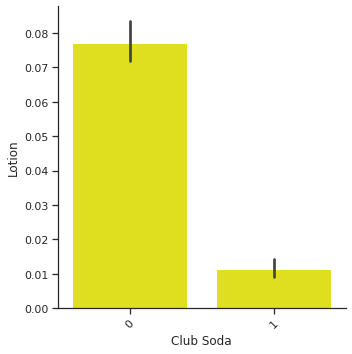

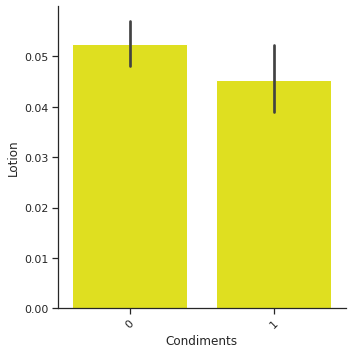

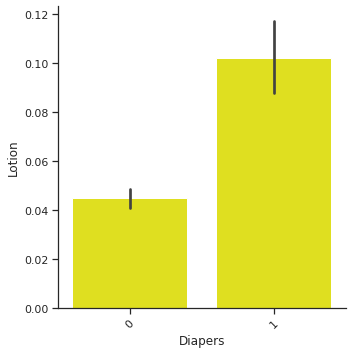

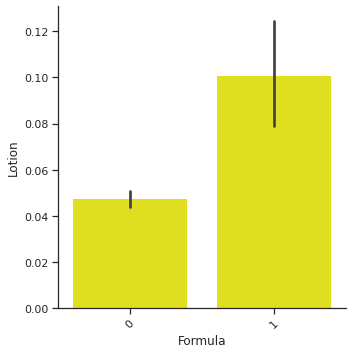

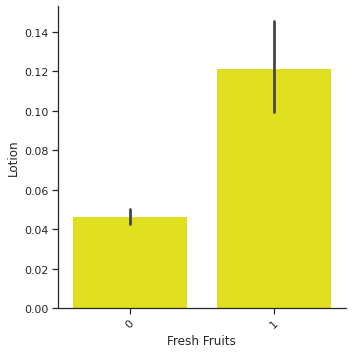

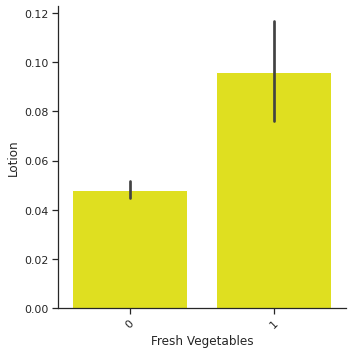

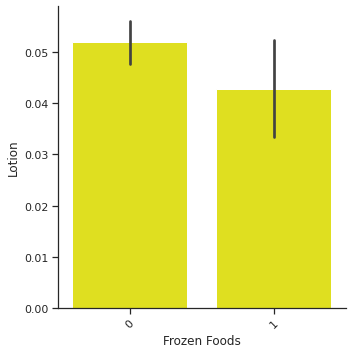

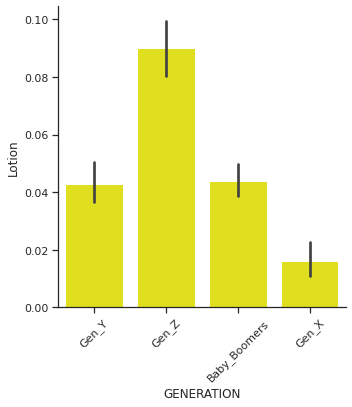

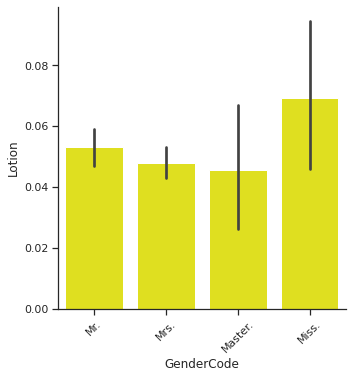

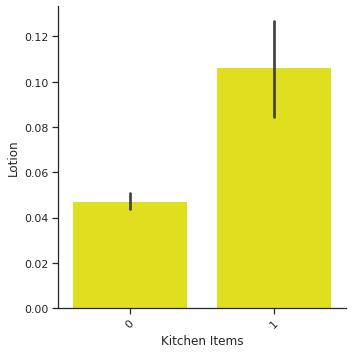

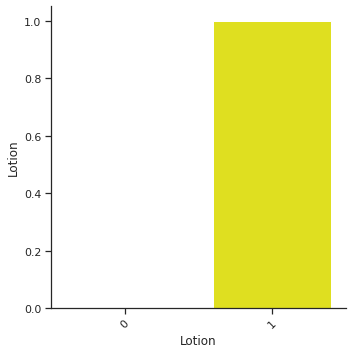

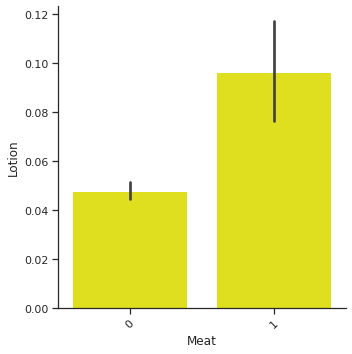

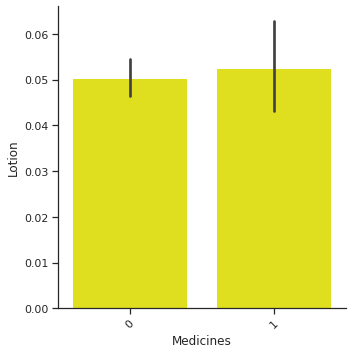

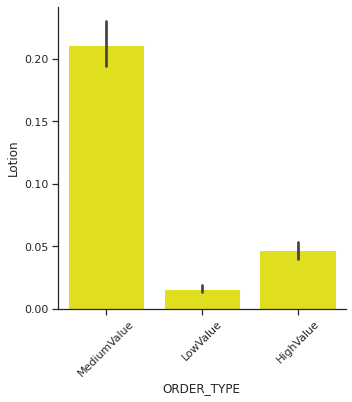

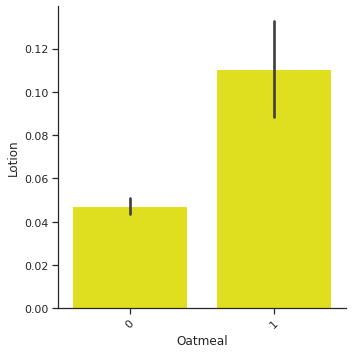

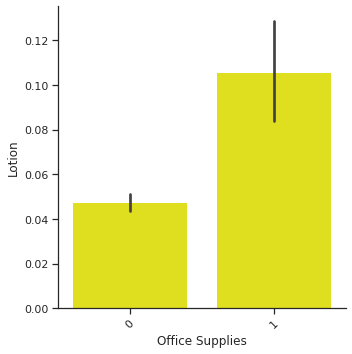

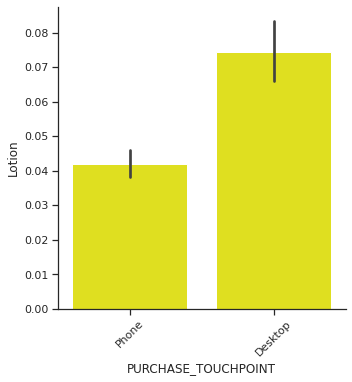

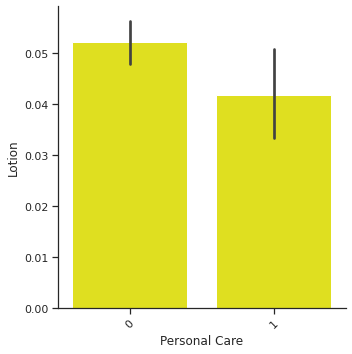

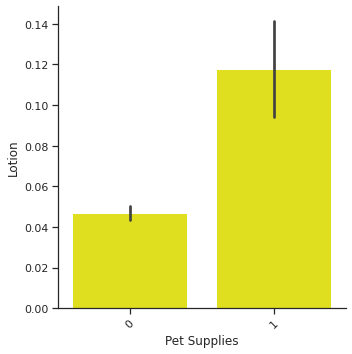

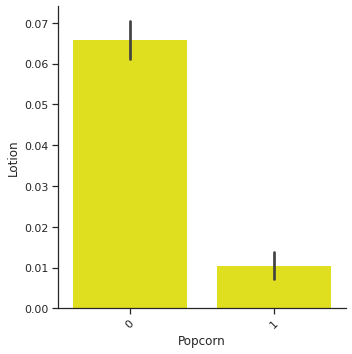

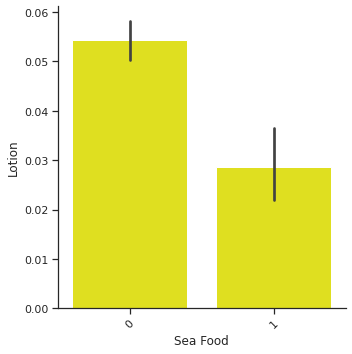

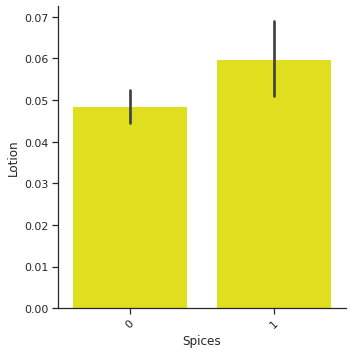

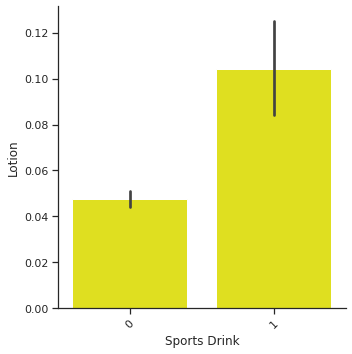

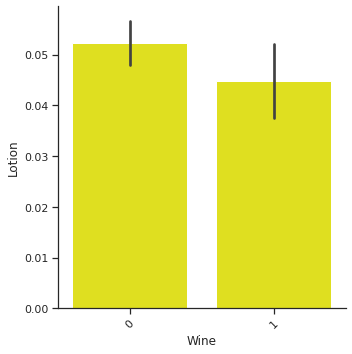

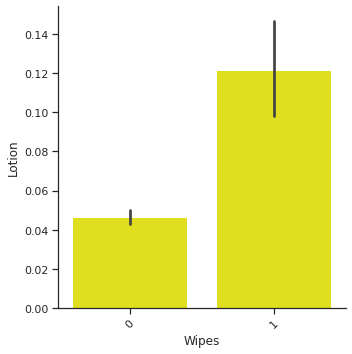

In [242]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

for col in sorted(df.columns):
    if df[col].nunique() <= 20:
        sns.catplot(x=col, y='Lotion', data=df, kind='bar', color='yellow')
        plt.xticks(rotation=45)
        plt.show() #Graphic analysis the principal product lotioon compared with the other products and differents variance.

### Analysis:

Logistic regression we analysis differents features in this dataset, the principal product the customer expense their money are the lotions, even in comparison that beer, cigarettes, and medicine if went be compared way to pay,  we can see that Diners Club is the credit card with the principal move in sales of Lotions,  followed by American Express.

Compared the Lotion versus Cheese the customers have the same level to buy of preference at the time acquire this product.

If we Compared the Lotion by generations, and see who the expense more in these items, and is the generation Z(born after 1997) -that will be the most target to sale this type of products-.

The genders are Miss and Mr. 

In the order type medium value is the quantity of money the customer expend. the preference most representative to buy Lotion is directly in the stores (desktop).


# Calculate Negative Mean Absolute Error

In [243]:
import category_encoders as ce
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.linear_model import Ridge
from scipy.stats import randint, uniform
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    SelectKBest(f_regression, k=20), 
    Ridge(alpha=1.0)
)

In [244]:
k = 3
scores = cross_val_score(pipeline, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')

In [245]:
print(f'MAE for {k} folds:', -scores)

MAE for 3 folds: [0.17884946 0.17892547 0.18024867]


In [246]:
-scores.mean()

0.17934119691805192

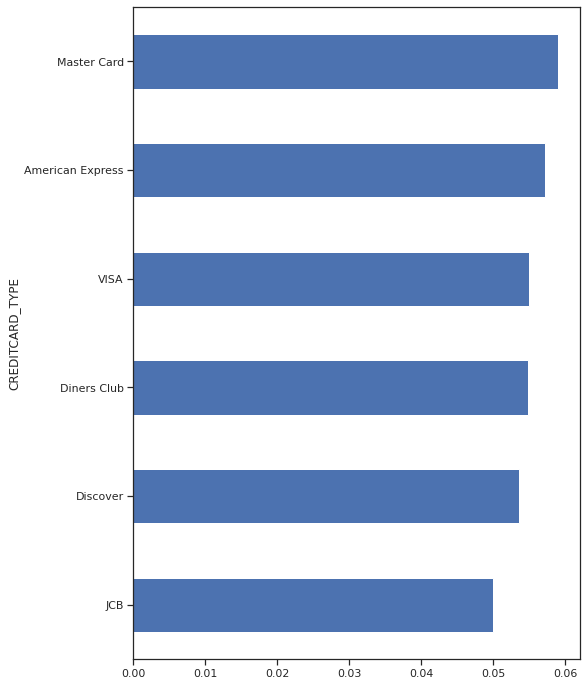

In [247]:
plt.figure(figsize=(8,12)) #the customer that expend more money in beer are who used Master card following by American Express.
df.groupby('CREDITCARD_TYPE')['Beer'].mean().sort_values().plot.barh();

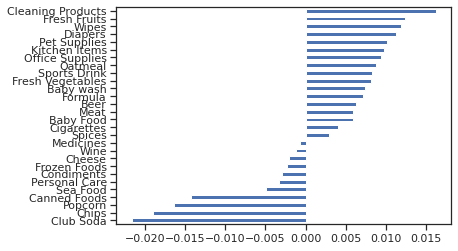

In [248]:
%matplotlib inline
coefficients = pd.Series(model.coef_[0], features)
coefficients.sort_values().plot.barh();

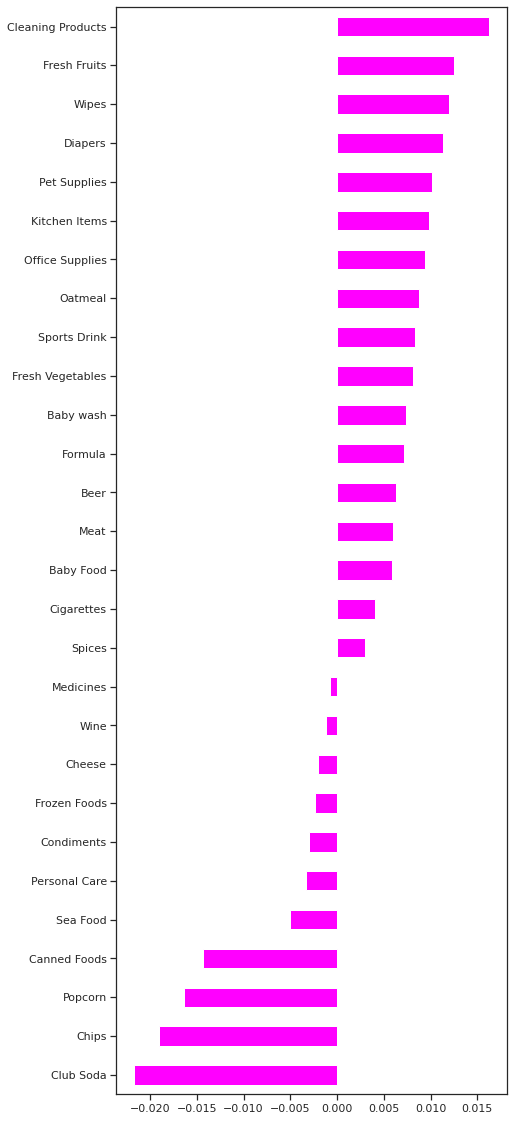

In [249]:
%matplotlib inline
coefficients.sort_values().plot.barh(color='magenta', figsize=(7,20));

### Analysis:

if we remove the Lotion the model show us that the product where customer expend more money are cleaning products.

# MODEL 2 - NEURAL NETWORK

In [250]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1, activation='softmax')
    ])
    return model
model = get_model()

In [251]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               3712      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

In [252]:
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

In [ ]:
history = model.fit(X_train.values, y_train.values, epochs=40,
                     validation_split=0.15, verbose=False)

In [ ]:
model.evaluate(X_test.values, y_test.values, verbose=2, batch_size=64)

# Conclusion:

For market segmentation, this study represents a decision-making tool, market niche and characterization of the target market. The model showed a precision of 0.95, which shows the shareholders of the company that the actions to be taken can be supported by the best-selling products, the community to which it will be offered, and the age range.We can conclude that the baby boomers generation continues to be in force since they exceed the other generations in quantity, who when buying do not repair how much to spend or what they spend, that hygiene products and fragrances are a market to enter. On the other hand, generation Z has changed the way of acquiring products and this leads to not depending on physical locations for the sale of products, but when it comes to lotions and everything in this category, physical facilities are required.